In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

C:\Users\abc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
x,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20, random_state = 13)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

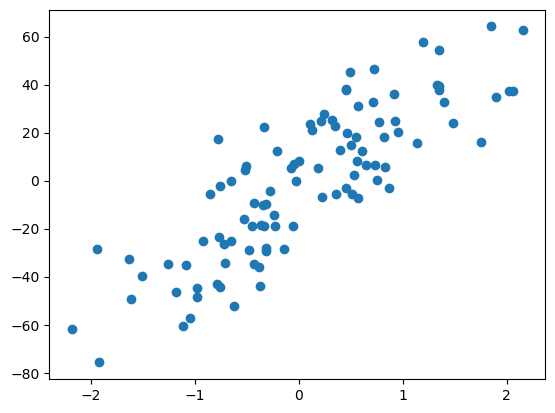

In [5]:
plt.scatter(x,y)

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [8]:
reg.fit(x_train,y_train)

LinearRegression()

In [9]:
print(reg.coef_)

[28.12597332]


In [10]:
print(reg.intercept_)

-2.2710144261783816


C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+04, tolerance: 8.397e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_desc

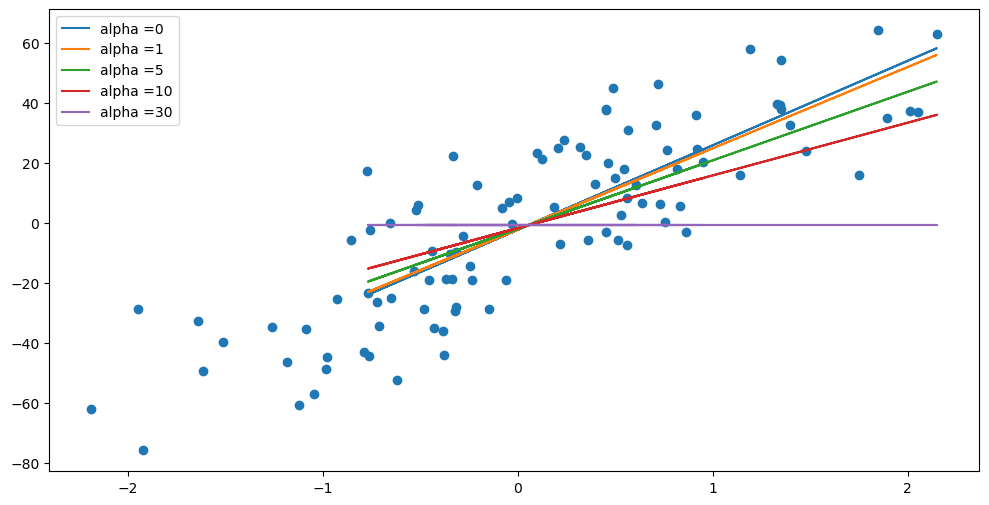

In [14]:
from sklearn.linear_model import Lasso
alphas = [0,1,5,10,30]
plt.figure(figsize = (12,6))
plt.scatter(x,y)
for i in alphas:
    L = Lasso(alpha = i)
    L.fit(x_train,y_train)
    plt.plot(x_test,L.predict(x_test),label = 'alpha ={}'.format(i))
plt.legend()
plt.show()

In [16]:
m = 100
x1 = 5*np.random.rand(m,1)-2
x2 = 0.7*x1**2 - 2*x1 +3+np.random.randn(m,1)

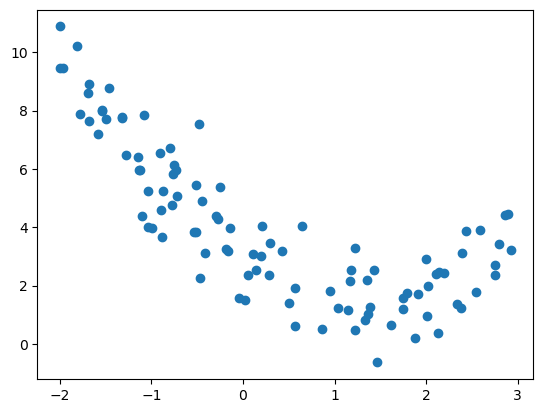

In [17]:
plt.scatter(x1,x2)
plt.show()

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [19]:
def get_preds_lasso(x1,x2,alpha):
    model = Pipeline([
        ('poly_feats',PolynomialFeatures(degree = 16)),
        ('lasso', Lasso(alpha = alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.070e+01, tolerance: 6.732e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_desc

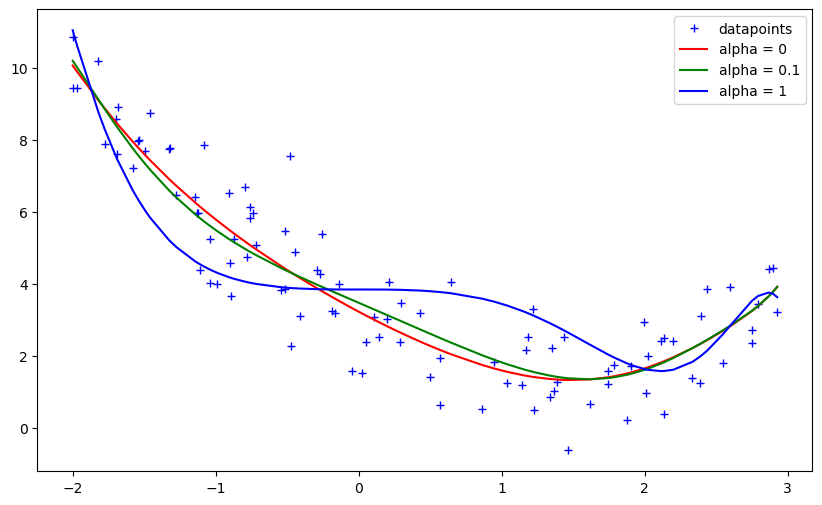

In [20]:
alphas = [0,0.1,1]
cs = ['r','g','b']
plt.figure(figsize = (10,6))
plt.plot(x1,x2,'b+',label = 'datapoints')
for alpha, c in zip(alphas,cs):
    preds = get_preds_lasso(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label = 'alpha = {}'.format(alpha))
plt.legend()
plt.show()